# Ecuaciones parciales diferenciales de evolución

Las ecuaciones diferenciales parciales (EDPs) constituyen un área de suma importancia en la física, ya que modelan sistemas que varían con respecto a varias variables *in*dependientes, por ejemplo, tanto el tiempo como el espacio.

Del punto de vista numérico, se puede decir que el tipo de EDPs que es más sencillo conceptualmente son las llamadas **parabólicas**, es decir, **ecuaciones de evolución**, de las cuales la más conocida es la **ecuación de calor** o **ecuación de difusión**.

# La ecuación de calor

La ecuación de calor modela el esparcimiento en el tiempo y en el espacio de un "paquete" de calor (perturbación local de temperatura en una región), o de concentración de una sustancia física o química, en cuyo caso se llama la **ecuación de difusión**. 

Llamemos $u(t, \mathbf{x})$ la perturbación de la temperatura o la concentración de la sustancia en la posición $\mathbf{x}$ al tiempo $t$. La ecuación de calor es

$$\frac{\partial u(t, \mathbf{x})}{\partial t} = D \, \nabla^2 u(t, \mathbf{x}).$$

[Recordemos que $\nabla^2 := \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}$ en tres dimensiones.]

Esta ecuación nos dice cómo varía la concentración en el tiempo, dadas las condiciones locales en el espacio. Se deriva a partir una ley de conservación que dice que la concentración de sustancia no se destruye, ni se construye, sino sólo fluye en el espacio. Al imponer esto en una caja chiquita y tomar el límite cuando el tamaño de la caja tiende a cero, obtenemos que

$$\frac{\partial u}{\partial t} + \nabla \cdot \mathbf{J} = 0.$$

Además, podemos suponer (al menos, en una primera aproximación) que el flujo de calor o de concentración $\mathbf{J}$ es proporcional a la gradiente local:

$$\mathbf{J} = -D \, \nabla u.$$

Sustituyendo esta relación en la anterior, obtenemos la ecuación de calor.

La ecuación de calor es una **ecuación de evolución**; es decir, describe cómo evoluciona el sistema en el tiempo (y en el espacio). Por lo tanto, su tratamiento se sigue de forma bastante directa de lo que hemos visto para EDOs.

## Una dimensión

Empecemos con el caso más sencillo, con sólo una dimensión espacial. En este caso, la ecuación de calor se reduce a


$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}.$$

Nota que aquí, las derivadas $\frac{\partial u}{\partial t}$ son ellas mismas *funciones del tiempo y de la posición*. De forma análoga a las EDOs, esta ecuación quiere decir que 

$$\frac{\partial u}{\partial t}(t, x) = D \frac{\partial^2 u}{\partial x^2}(t, x),$$

para todas las $t \in [t_0, t_f]$ y todas las $x$ en un rango dado (que puede ser infinito).

Para resolver esta EDP, necesitaremos una condición inicial funcional, $u(t=0, x) = f(x)$ (una función del espacio), así como condiciones en la frontera $u(t, x)$ para todos los valores de $x$ que se encuentren en la frontera del dominio espacial, y para todo $t$.

# Métodos numéricos para la ecuación de calor

Dado que, como siempre, no podemos resolver problemas de naturaleza continua en la computadora, debemos *aproximar* la solución $u(t, x)$ de alguna forma a través de una **discretización**. Hay distintas formas de llevar a cabo la discretización; aquí, escogeremos el más sencillo.

#### Ejercicio 1

(i) Pensando en tu experiencia con las ecuaciones diferenciales ordinarias, ¿cómo se puede discretizar $u(t, x)$, utilizando un tamaño de paso $h$ en el tiempo y $k$ en el espacio? Toma el intervalo $[-L, L]$ como los valores posibles de $x$, así como tiempos en el rango $[t_0, t_f]$.

Denotemos con $t_n$ el tiempo al paso número $n$, y con $u^n_i$ la aproximación de la solución en el nodo número $i$ en el espacio al tiempo $n$.

(ii) ¿Cómo se puede discretizar la ecuación de calor unidimensional? 

(iii) Reescribe la discretización para dar $u^{n+1}_i$ en términos de distintos $u^n_j$s al tiempo anterior.

#### Ejercicio 2

Considera la ecuación de calor en una dimensión sobre el intervalo de $x=-L$ a $x=L$, con condición inicial $u(t=0, x) = \delta(x)$, donde $\delta$ es la delta de Dirac, y condiciones de frontera absorbentes (de Dirichlet), es decir, $u(t, x=-L) = u(t, x=L) = 0$ para $t > 0$.

(i) ¿Qué esperas intuitivamente que pase durante la evolución? ¿Qué pasará para tiempos largos?

(ii) Escribe la solución analítica exacta para $u(x, t)$ en el caso cuando $L = \infty$ (es decir, cuando "no hay fronteras" y la difusión ocurre en toda la recta real). [No es necesario que *derives* la solución, sólo que la anotes.]

(iii) Dibuja la solución analítica como función del tiempo.

#### Ejercicio 3

(i) Para resolver la ecuación de calor en la computadora, debemos saber cómo discretizar la $\delta$ de Dirac; recuerda que es es un bicho raro, ya que *no es una función*. [De hecho, la delta de Dirac es un ejemplo de lo que se llama una **distribución** o [**función generalizada**](https://en.wikipedia.org/wiki/Generalized_function).]

Pensando que (la parte no-cero de) la delta de Dirac se localiza en una celda de la discretización con ancho $h$, ¿cómo podemos representar la condición inicial para que *tenga la misma área* que $\delta(x)$? [Pista: ¿Cuál es el "área" debajo de la delta de Dirac? ¿Cómo podemos darle la misma área a nuestra condición inicial si consideramos que aproximamos la delta con una función constante en una caja?]

In [2]:
L = 5
T = 10

10

In [3]:
k = 0.1 
h = 0.001 

0.001

In [5]:
xs = -L:k:L 
ts = 0:h:T

0.0:0.001:10.0

In [13]:
using Plots

┌ Info: Recompiling stale cache file /Users/dpsanders/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


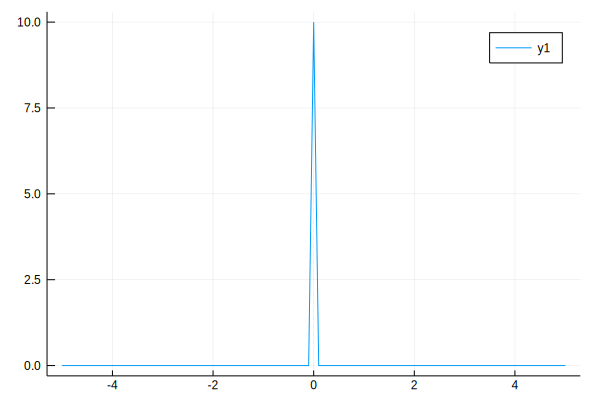

In [14]:
u0 = zeros(length(xs)) 
u0[Int(ceil(length(u0)/2))] = 1/k 
plot(xs,u0) 

In [16]:
D = 1

1

In [17]:
u_nueva = zeros(length(u0)) 
for i in 2:(length(u0) - 1) 
    u_nueva[i] = u0[i] + (D*h/k^2)*(u0[i-1] - 2*u0[i] + u0[i+1]) 
    end 
u_nueva[1] = 0 
u_nueva[end] = 0 #Ésto determina los valores de frontera. 

0

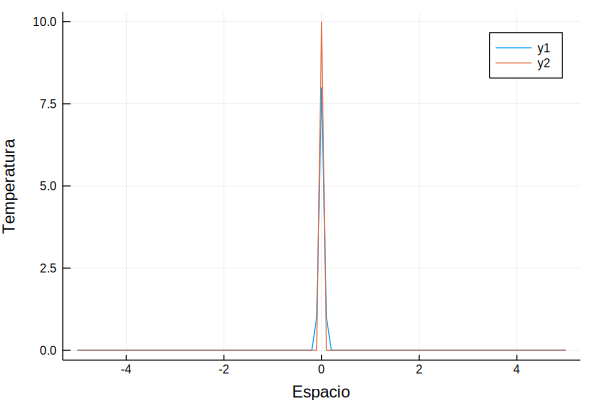

In [19]:
plot(xs,u_nueva)
plot!(xs,u0, xlabel="Espacio",ylabel="Temperatura")

(ii) Implementa el sistema, tomando cuidado en lo que ocurre en las fronteras. Para hacerlo, puedes utilizar un vector para representar el estado actual del sistema, y otro vector para el estado al tiempo siguiente. [Nota que deberás tomar en cuenta el punto tocado en el Ejercicio 4: puede que tu método numérico explota; en ese caso; reduce la $h$ hasta que ya no explote.]

In [ ]:
f(us)

In [20]:
function paso_calor(u0,adim) #adim = Dh/k^2 
    
    u_nueva = zeros(length(u0)) 
    
    for i in 2:(length(u0) - 1) 
        u_nueva[i] = u0[i] + adim*(u0[i-1] - 2*u0[i] + u0[i+1]) 
    end 
    
    u_nueva[1] = 0 
    u_nueva[end] = 0 #Ésto determina los valores de frontera. 
    
    return u_nueva 
    
end 

paso_calor (generic function with 1 method)

In [25]:
function calor(u0,h,k,L,T) 
    xs = -L:k:L 
    ts = 2:h:T 
    
    adim = h/k^2 # D = 1 
    datos = [u0]
    
    for t in ts
        u_nueva = paso_calor(u0,adim)
        push!(datos,u_nueva)
        u0 = u_nueva
    end 
    
    return datos 
end

calor (generic function with 2 methods)

(iii) Dibuja la evolución en el tiempo, por ejemplo usando `Interact`. ¿Ocurre lo que esperabas? Dibuja en la misma gráfica la solución analítica exacta para $L = \infty$. ¿Qué observas?

(iv) También dibuja la evolución como un "heat map" (mapa de calor), es decir, dibuja la matriz dos-dimensional $u^n_i$ con colores que representan los valores de cada elemento de la matriz. [Pista: Utiliza la función `heatmap` de `Plots.jl`.]

(v) ¿Qué ocurre si tomas otra condición inicial, por ejemplo una suma de dos deltas? Compáralo con el caso anterior.

(vi) Pensando en la ecuación como la ecuación de difusión, ¿cuál cantidad relacionada con $u$ representa la cantidad total de masa? ¿Qué debería satisfacer esta cantidad durante la evolución para un sistema infinito? ¿Qué ocurre con esta cantidad cuando hay condiciones de frontera de Dirichlet? Demuéstralo numéricamente.

#### Ejercicio 4

(i) Los parámetros $h$ y $k$ de la discretización en el tiempo y en el espacio, respectivamente, ocurren en una cierta combinación adimensional en la ecuación discretizada que obtuviste. ¿Cuál es?  

(ii) Resulta que el método numérico es estable para ciertos valores de este parámetro adimensional, e inestable para otros. Encuentra numéricamente el valor crítico de este parámetro, debajo del cual el método es estable y arriba del cual es inestable.

#### Ejercicio 5

Considera la ecuación de difusión unidimensional, pero ahora con condiciones de frontera **reflejantes** (de Neumann).

(i) Escribe la ecuación correspondiente a las condiciones de frontera en $x=\pm L$.

(ii) ¿Cómo se puede discretizar en términos de la misma discretización que antes?

(iii) ¿Qué esperas intuitivamente que ocurre con este tipo de ecuaciones de frontera?

(iv) Impleméntalo y grafica la evolución temporal.

(v) Confirma la ley de conservación en este caso.

#### Ejercicio 6

Considera un sistema con condiciones **periódicas**, es decir, 
sobre un círculo, en el cual $u(x=0) = u(x=L)$ para toda $t$. 

Numéricamente, esto quiere decir que la vecina izquierda de la celda número 1 es la celda número $L$, y vice versa.
Esto se puede implementar con un `if` o un `%`, o bien haciendo "celdas fantasmas" adicionales, a las cuales se copia la información correspondiente en cada paso.

(i) ¿Qué esperas intuitivamente ver con estas condiciones de frontera?

(ii) Impleméntalo, tal que puedas escoger qué tipo de condiciones de frontera quieras según un argumento a la función.

(iii) ¿Se tiene una ley de conservación en este caso? Demúestralo numéricamente.

#### Ejercicio 7

Regresemos a la ecuación de calor original y pensemos *únicamente* en la parte de la evolución temporal.

(i) ¿A qué método numérico para EDOs corresponde lo que ya implementaste?

(ii) Ahora, discretiza *sólo* la derivada espacial de la ecuación de calor, dejando *sin* discretizarse la derivada temporal. El resultado se llama una **semi-discretización** de la ecuación. ¿Qué forma tienen las ecuaciones resultantes?

(iii) Así, especifica cuáles otros métodos numéricos podrías aplicar.

(iv) Impleméntalo.